data visualization

statistical graphing

In [1]:
#Task 1.0  import libraries 
#import pandas
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import numpy as np
import os
import sklearn
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
##import inforamtion from cleaned data from previous 
#Task 1.1  import csv file

UsedVehicle=pd.read_csv(r'.\Data\UsedCarData\clean_vehicles.csv', header=0 )

In [3]:
UsedVehicle.head(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,7316814884,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,...,unknown,unknown,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,al,32.59,-85.48,2021-05-04 12:31:18-05:00
1,7316814758,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,...,unknown,unknown,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,al,32.59,-85.48,2021-05-04 12:31:08-05:00
2,7316814989,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,...,unknown,unknown,pickup,red,https://images.craigslist.org/01212_jjirIWa0y0...,Carvana is the safer way to buy a car During t...,al,32.59,-85.48,2021-05-04 12:31:25-05:00
3,7316743432,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,...,unknown,unknown,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,Carvana is the safer way to buy a car During t...,al,32.59,-85.48,2021-05-04 10:41:31-05:00
4,7316356412,https://auburn.craigslist.org/cto/d/auburn-uni...,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,...,rwd,full-size,truck,black,https://images.craigslist.org/00404_l4loxHvdQe...,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,32.592,-85.5189,2021-05-03 14:02:03-05:00
5,7316343444,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,...,4wd,unknown,pickup,black,https://images.craigslist.org/00V0V_ftJbKrOgdi...,Carvana is the safer way to buy a car During t...,al,32.59,-85.48,2021-05-03 13:41:25-05:00
6,7316304717,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,...,4wd,unknown,pickup,silver,https://images.craigslist.org/00E0E_iKN07Sh7ou...,Carvana is the safer way to buy a car During t...,al,32.59,-85.48,2021-05-03 12:41:33-05:00
7,7316285779,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,35000,2019.0,toyota,tacoma,excellent,6 cylinders,...,4wd,unknown,truck,grey,https://images.craigslist.org/00101_dXoZTH7iVm...,Selling my 2019 Toyota Tacoma TRD Off Road Dou...,al,32.6013,-85.443974,2021-05-03 12:12:59-05:00
8,7316257769,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,...,4wd,unknown,pickup,red,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,al,32.59,-85.48,2021-05-03 11:31:14-05:00
9,7316133914,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,38590,2011.0,chevrolet,corvette grand sport,good,8 cylinders,...,rwd,unknown,other,red,https://images.craigslist.org/00U0U_kKYnS1LWh8...,Carvana is the safer way to buy a car During t...,al,32.59,-85.48,2021-05-03 07:50:35-05:00


In [4]:
#Task 1.2

UsedVehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416149 entries, 0 to 416148
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            416149 non-null  int64  
 1   url           416149 non-null  object 
 2   region        416149 non-null  object 
 3   region_url    416149 non-null  object 
 4   price         416149 non-null  int64  
 5   year          416149 non-null  float64
 6   manufacturer  416149 non-null  object 
 7   model         416149 non-null  object 
 8   condition     416149 non-null  object 
 9   cylinders     416149 non-null  object 
 10  fuel          416149 non-null  object 
 11  odometer      416149 non-null  float64
 12  title_status  416149 non-null  object 
 13  transmission  416149 non-null  object 
 14  VIN           416149 non-null  object 
 15  drive         416149 non-null  object 
 16  size          416149 non-null  object 
 17  type          416149 non-null  object 
 18  pain

The 3 column that I think are useless are 
    id
    url
    region_url
    image_url
    
    
    

In [5]:
#Task 1.3
UsedVehicle.drop(['id','url','region_url','image_url'],axis =1,inplace =True)

In [6]:
#Task 1.4
UsedVehicle.head(10)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date
0,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,...,3GTP1VEC4EG551563,unknown,unknown,pickup,white,Carvana is the safer way to buy a car During t...,al,32.59,-85.48,2021-05-04 12:31:18-05:00
1,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,...,1GCSCSE06AZ123805,unknown,unknown,pickup,blue,Carvana is the safer way to buy a car During t...,al,32.59,-85.48,2021-05-04 12:31:08-05:00
2,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,...,3GCPWCED5LG130317,unknown,unknown,pickup,red,Carvana is the safer way to buy a car During t...,al,32.59,-85.48,2021-05-04 12:31:25-05:00
3,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,...,5TFRM5F17HX120972,unknown,unknown,pickup,red,Carvana is the safer way to buy a car During t...,al,32.59,-85.48,2021-05-04 10:41:31-05:00
4,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,...,blank,rwd,full-size,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,32.592,-85.5189,2021-05-03 14:02:03-05:00
5,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,...,1GT220CG8CZ231238,4wd,unknown,pickup,black,Carvana is the safer way to buy a car During t...,al,32.59,-85.48,2021-05-03 13:41:25-05:00
6,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,...,1GCVKREH6GZ228691,4wd,unknown,pickup,silver,Carvana is the safer way to buy a car During t...,al,32.59,-85.48,2021-05-03 12:41:33-05:00
7,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,...,blank,4wd,unknown,truck,grey,Selling my 2019 Toyota Tacoma TRD Off Road Dou...,al,32.6013,-85.443974,2021-05-03 12:12:59-05:00
8,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,...,1GCHTCE37G1186784,4wd,unknown,pickup,red,Carvana is the safer way to buy a car During t...,al,32.59,-85.48,2021-05-03 11:31:14-05:00
9,auburn,38590,2011.0,chevrolet,corvette grand sport,good,8 cylinders,gas,30237.0,clean,...,1G1YR3DW3B5102190,rwd,unknown,other,red,Carvana is the safer way to buy a car During t...,al,32.59,-85.48,2021-05-03 07:50:35-05:00


In [7]:
#Task 1.5
UsedVehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416149 entries, 0 to 416148
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        416149 non-null  object 
 1   price         416149 non-null  int64  
 2   year          416149 non-null  float64
 3   manufacturer  416149 non-null  object 
 4   model         416149 non-null  object 
 5   condition     416149 non-null  object 
 6   cylinders     416149 non-null  object 
 7   fuel          416149 non-null  object 
 8   odometer      416149 non-null  float64
 9   title_status  416149 non-null  object 
 10  transmission  416149 non-null  object 
 11  VIN           416149 non-null  object 
 12  drive         416149 non-null  object 
 13  size          416149 non-null  object 
 14  type          416149 non-null  object 
 15  paint_color   416149 non-null  object 
 16  description   416149 non-null  object 
 17  state         416149 non-null  object 
 18  lat 

In [8]:
#Task 1.6
UsedVehicle.describe()

,price,year,odometer
count,4.161490e+05,416149.000000,4.161490e+05
mean,6.158955e+04,2011.365749,9.766435e+04
std,1.108080e+07,9.140825,2.046903e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.995000e+03,2008.000000,3.800000e+04
50%,1.399100e+04,2014.000000,8.568200e+04
75%,2.650000e+04,2017.000000,1.335030e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [9]:
#Task 2.0
#take a look what is 25%, 50% and 75% of credit of loan
# median loan 5995, 13991, 26500
np.percentile(UsedVehicle['price'],[25,50,75])

array([ 5995., 13991., 26500.])

In [10]:
#Task 3.1.0
UsedVehicle['region'].unique()

array(['auburn', 'birmingham', 'dothan', 'florence / muscle shoals',
       'gadsden-anniston', 'huntsville / decatur', 'mobile', 'montgomery',
       'tuscaloosa', 'anchorage / mat-su', 'fairbanks', 'kenai peninsula',
       'southeast alaska', 'flagstaff / sedona', 'mohave county',
       'phoenix', 'prescott', 'show low', 'sierra vista', 'tucson',
       'yuma', 'fayetteville', 'fort smith', 'jonesboro', 'little rock',
       'texarkana', 'bakersfield', 'chico', 'fresno / madera',
       'gold country', 'hanford-corcoran', 'humboldt county',
       'imperial county', 'inland empire', 'los angeles',
       'mendocino county', 'merced', 'modesto', 'monterey bay',
       'orange county', 'palm springs', 'redding', 'reno / tahoe',
       'sacramento', 'san diego', 'san luis obispo', 'santa barbara',
       'santa maria', 'SF bay area', 'siskiyou county', 'stockton',
       'susanville', 'ventura county', 'visalia-tulare', 'yuba-sutter',
       'boulder', 'colorado springs', 'denver', 'e

In [11]:
#Task 3.1.1

a=len(UsedVehicle['region'].unique())
print(a)

404


In [12]:
#Task 3.2.0

UsedVehicle['manufacturer'].unique()

array(['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'unknown', 'acura', 'hyundai', 'mercedes-benz', 'bmw',
       'mitsubishi', 'volkswagen', 'porsche', 'kia', 'ferrari', 'mini',
       'pontiac', 'fiat', 'rover', 'tesla', 'saturn', 'mercury',
       'harley-davidson', 'datsun', 'aston-martin', 'land rover'],
      dtype=object)

In [13]:
#Task 3.2.1


a=len(UsedVehicle['manufacturer'].unique())
print(a)

42


In [14]:
#Task 3.3.0
#there is 113 years of cars.  it might be intersting to find which vehicle 
#at which year sells the most car
UsedVehicle['year'].unique()

array([2014., 2010., 2020., 2017., 2013., 2012., 2016., 2019., 2011.,
       1992., 2018., 2004., 2015., 2001., 2006., 2003., 2008., 2007.,
       2005., 1966., 2009., 1998., 2002., 1999., 2021., 1997., 1976.,
       1969., 1995., 1978., 1954., 1979., 1970., 1974., 1996., 1987.,
       2000., 1955., 1991., 1972., 1988., 1994., 1968., 1984., 1986.,
       1989., 1973., 1946., 1933., 1958., 1985., 1957., 1953., 1942.,
       1963., 1977., 1993., 1990., 1982., 1948., 1983., 1936., 1932.,
       1951., 1980., 1967., 1971., 1981., 1947., 1926., 1962., 1975.,
       1964., 1952., 1940., 1959., 1930., 1950., 1965., 1922., 1928.,
       2022., 1901., 1960., 1941., 1929., 1956., 1924., 1927., 1939.,
       1923., 1949., 1937., 1934., 1931., 1961., 1935., 1918., 1900.,
       1938., 1913., 1916., 1943., 1925., 1921., 1915., 1945., 1902.,
       1905., 1920., 1944., 1910., 1909.])

In [15]:
#Task 3.3.1
a=len(UsedVehicle['year'].unique())
print(a)

113


In [16]:
#Task 3.4.0
#Looking at the different model it might be hard to find something interesting out of it
UsedVehicle['model'].unique()

array(['sierra 1500 crew cab slt', 'silverado 1500',
       'silverado 1500 crew', ..., 'gand wagoneer', '96 Suburban',
       'Paige Glenbrook Touring'], dtype=object)

In [17]:
#Task 3.4.1
a=len(UsedVehicle['model'].unique())
print(a)

29236


In [18]:
#Task 3.5.0
#Find which type of cars are the sold
#
UsedVehicle['condition'].unique()

array(['good', 'excellent', 'fair', 'like new', 'unknown', 'new',
       'salvage'], dtype=object)

In [19]:
#Task 3.5.1
a=len(UsedVehicle['condition'].unique())
print(a)

7


In [20]:
#Task 3.6.0
#type of cars are being the class
UsedVehicle['fuel'].unique()

array(['gas', 'other', 'diesel', 'hybrid', 'unknown', 'electric'],
      dtype=object)

In [21]:
#Task 3.6.1
a=len(UsedVehicle['fuel'].unique())
print(a)

6


In [22]:
#Task 3.7.0
#type of car sold
UsedVehicle['title_status'].unique()

array(['clean', 'rebuilt', 'lien', 'unknown', 'salvage', 'missing',
       'parts only'], dtype=object)

In [23]:
#Task 3.7.1
a=len(UsedVehicle['title_status'].unique())
print(a)

7


In [24]:
#Task 3.8.0
UsedVehicle['transmission'].unique()

array(['other', 'automatic', 'manual', 'unknown'], dtype=object)

In [25]:
#Task 3.8.1
a=len(UsedVehicle['transmission'].unique())
print(a)

4


In [26]:
#Task 3.9.0
UsedVehicle['drive'].unique()

array(['unknown', 'rwd', '4wd', 'fwd'], dtype=object)

In [27]:
#Task 3.9.1
a=len(UsedVehicle['drive'].unique())
print(a)

4


In [28]:
#Task 3.10
UsedVehicle['size'].unique()

array(['unknown', 'full-size', 'mid-size', 'compact', 'sub-compact'],
      dtype=object)

In [29]:
#Task 3.10
a=len(UsedVehicle['size'].unique())
print(a)

5


In [30]:
#Task 5.2
#_=CCLoan.groupby('LATE_PAYMENT')['NAME_EDUCATION_TYPE'].hist(bins =5)
#_=plt.xlabel('NAME_EDUCATION_TYPE')
#_=plt.ylabel('LATE_PAYMENT')
#_=plt.title("Late Payment vs NAME_EDUCATION_TYPE")

#plt.show()





#Task 5.4.1
#CCLoan_new=CCLoan.groupby('LATE_PAYMENT')['NAME_FAMILY_STATUS'].value_counts().unstack(0)
#CCLoan_new/CCLoan_new.sum()



#Task 5.8
UsedVehicle_new=UsedVehicle.groupby('size')['price'].mean()

print(UsedVehicle_new)




size
compact         16883.896711
full-size       99610.141978
mid-size       121264.816361
sub-compact     12383.630933
unknown         50107.260701
Name: price, dtype: float64


In [34]:
UsedVehicle_new01=UsedVehicle.groupby(['size','year'])['price'].mean()

In [35]:
print(UsedVehicle_new01)

size     year  
compact  1913.0    27000.000000
         1916.0    30000.000000
         1923.0    18335.833333
         1926.0     6500.000000
         1927.0    19999.166667
                       ...     
unknown  2018.0    27240.329895
         2019.0    31078.404807
         2020.0    34719.157160
         2021.0    92839.430520
         2022.0    30673.136752
Name: price, Length: 463, dtype: float64


<AxesSubplot:xlabel='year'>

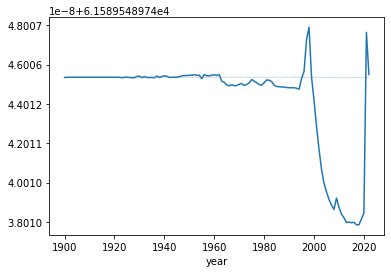

In [38]:
sns.lineplot(x=UsedVehicle['year'],y=UsedVehicle['price'].mean(), data =UsedVehicle)

In [40]:
#Task 3.11.0
UsedVehicle['type'].unique()

array(['pickup', 'truck', 'other', 'unknown', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible',
       'wagon'], dtype=object)

In [41]:
#Task 3.11.1
a=len(UsedVehicle['type'].unique())
print(a)

14


There are 14 type of cars. i want to see what is average price
From below the least expesnive is mini-van. 1/4 of data is unknown ['type'] of vehicle

In [43]:
UsedVehicle_new02=UsedVehicle.groupby(['type'])['price'].mean()
UsedVehicle_new02

type
SUV             34787.758197
bus             14151.493069
convertible     20065.692399
coupe           22003.684947
hatchback       14454.374795
mini-van         9298.793567
offroad         15995.807496
other           24741.169535
pickup         149168.080729
sedan           16046.391414
truck           27490.611739
unknown        142381.842095
van             17286.600551
wagon           13362.944147
Name: price, dtype: float64

In [44]:
#Task 3.12.0
UsedVehicle['paint_color'].unique()

array(['white', 'blue', 'red', 'black', 'silver', 'grey', 'unknown',
       'brown', 'yellow', 'orange', 'green', 'custom', 'purple'],
      dtype=object)

In [45]:
#Task 3.12.1
a=len(UsedVehicle['paint_color'].unique())
print(a)

13


I want to know the break down of which the most popular color


In [60]:
UsedVehicle.groupby(['paint_color'])['size'].value_counts().unstack(0)

paint_color,black,blue,brown,custom,green,grey,orange,purple,red,silver,unknown,white,yellow
size,,,,,,,,,,,,,
compact,3326,2081,355,516,476,1999,149,57,1999,2843,1195,3236,221
full-size,10376,5549,1776,2204,1785,6261,272,179,5353,7403,3001,17636,468
mid-size,5732,3649,981,1153,1091,4322,208,98,3299,5347,1375,6579,260
sub-compact,567,369,60,68,101,258,36,6,371,413,275,503,70
unknown,41626,19047,3315,2696,3714,11102,1276,324,18893,26221,119319,49650,1059


In [61]:
#Task 3.13.0
#useless as description will be different, i would  think of dropping this column as long sentences of text
#cannot be converted into meaningful data


UsedVehicle['description'].unique()

array(["Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can get the car you want, and trade in your old one, while avoiding person-to-person contact with our friendly advocates. There are some things that can’t be put off. And if buying a car is one of them, know that we’re doing everything we can to keep you keep moving while continuing to put your health safety, and happiness first. Vehicle Stock# 2000909557📱 Want to instantly check this car’s availability? Call us at  334-758-9176Just text that stock number to 855-976-4304 or head to http://www.carvanaauto.com/7171237-74502 and plug it into the search bar!Get PRE-QUALIFIED for your auto loan in 

UsedVehicle['description'].nunique()

In [63]:
#Task 3.14.0
UsedVehicle['state'].unique()

array(['al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga',
       'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'ma',
       'mi', 'mn', 'ms', 'mo', 'mt', 'nc', 'ne', 'nv', 'nj', 'nm', 'ny',
       'nh', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx',
       'ut', 'vt', 'va', 'wa', 'wv', 'wi', 'wy'], dtype=object)

In [64]:
#Task 3.14.1
a=len(UsedVehicle['state'].unique())
print(a)

51


there is 51 states and there are only 50 states.  I figured out they used DC as a state.  I will also compare what stated vs type of cars sold

In [66]:
UsedVehicle.groupby(['size'])['state'].value_counts().unstack(0)

size,compact,full-size,mid-size,sub-compact,unknown
state,,,,,
ak,77.0,452.0,295.0,12.0,2587.0
al,139.0,779.0,392.0,24.0,3506.0
ar,98.0,478.0,258.0,7.0,3101.0
az,340.0,1147.0,706.0,61.0,6156.0
ca,2415.0,7076.0,3436.0,377.0,35429.0
co,563.0,1354.0,1160.0,67.0,7658.0
ct,275.0,746.0,455.0,76.0,3542.0
dc,227.0,385.0,231.0,39.0,2040.0
de,22.0,181.0,80.0,1.0,654.0


In [67]:
UsedVehicle.groupby(['type'])['state'].value_counts().unstack(0)

type,SUV,bus,convertible,coupe,hatchback,mini-van,offroad,other,pickup,sedan,truck,unknown,van,wagon
state,,,,,,,,,,,,,,
ak,946.0,1.0,29.0,77.0,73.0,66.0,13.0,104.0,387.0,758.0,457.0,323.0,47.0,142.0
al,844.0,26.0,79.0,194.0,172.0,33.0,5.0,245.0,607.0,942.0,333.0,1177.0,104.0,79.0
ar,465.0,4.0,87.0,134.0,198.0,27.0,6.0,198.0,532.0,481.0,232.0,1473.0,67.0,38.0
az,1269.0,5.0,171.0,407.0,414.0,86.0,35.0,755.0,1219.0,1698.0,448.0,1558.0,165.0,180.0
ca,8118.0,32.0,1041.0,2470.0,2536.0,415.0,120.0,2612.0,4581.0,12239.0,3093.0,9154.0,1063.0,1259.0
co,2447.0,16.0,112.0,366.0,413.0,75.0,25.0,536.0,1298.0,2030.0,728.0,2168.0,187.0,401.0
ct,749.0,1.0,116.0,213.0,299.0,56.0,8.0,616.0,550.0,1079.0,168.0,971.0,86.0,182.0
dc,494.0,3.0,71.0,167.0,153.0,47.0,2.0,231.0,227.0,894.0,76.0,323.0,94.0,140.0
de,129.0,1.0,21.0,45.0,23.0,12.0,1.0,23.0,75.0,213.0,84.0,277.0,8.0,26.0


In [68]:
#Task 3.15.0
UsedVehicle['posting_date'].unique()

array(['2021-05-04 12:31:18-05:00', '2021-05-04 12:31:08-05:00',
       '2021-05-04 12:31:25-05:00', ..., '2021-04-04 03:21:17-06:00',
       '2021-04-04 03:21:11-06:00', '2021-04-04 03:21:07-06:00'],
      dtype=object)

In [69]:
#Task 3.15.1
a=len(UsedVehicle['posting_date'].unique())
print(a)

372113


<AxesSubplot:>

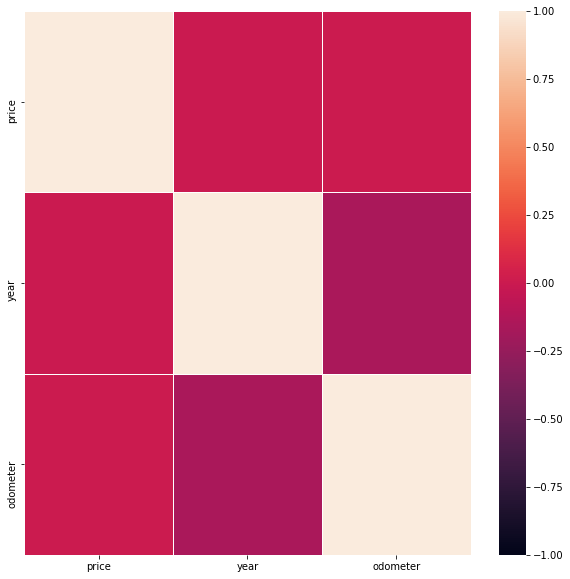

In [70]:
#Task 4.0
#test data to see correlation mapping
#Heat map with columns that are floats or int.  It will not work with str.
#adjust the scale so i can see anything that has correation greater than 0.  
#Previous chart with -1 to 1 was difficult to distinguest correlation

UsedVehicle_corr=UsedVehicle.corr()
fig,ax  =plt.subplots(figsize = (10,10))
sns.heatmap(UsedVehicle_corr, linewidth=.5,ax=ax, vmin=-1,vmax=1)

Looking at price / odometer and odometer / year

In [73]:
UsedVehicle[['odometer','year','price']].describe()

,odometer,year,price
count,4.161490e+05,416149.000000,4.161490e+05
mean,9.766435e+04,2011.365749,6.158955e+04
std,2.046903e+05,9.140825,1.108080e+07
min,0.000000e+00,1900.000000,0.000000e+00
25%,3.800000e+04,2008.000000,5.995000e+03
50%,8.568200e+04,2014.000000,1.399100e+04
75%,1.335030e+05,2017.000000,2.650000e+04
max,1.000000e+07,2022.000000,3.736929e+09


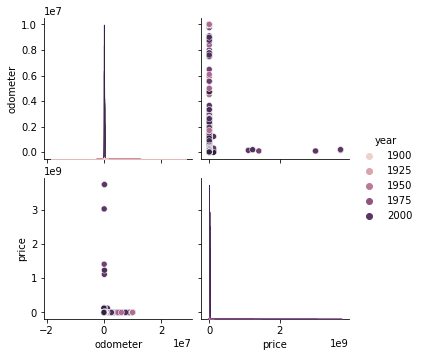

In [74]:
#Task 5.1
#seaborn pair plot
df1 = UsedVehicle[['odometer','year','price']]
sns.pairplot(df1, hue='year')



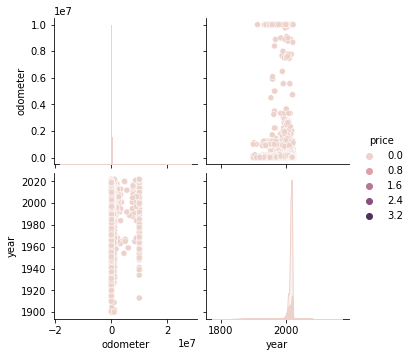

In [75]:
#Task 5.2


df2 = UsedVehicle[['odometer','year','price']]
sns.pairplot(df2, hue='price')



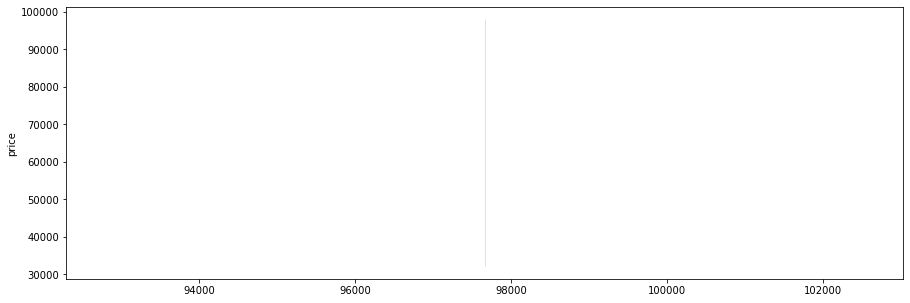

In [76]:
#Task 5.3.0
#box plot
plt.figure(figsize = (15,5))
sns.lineplot(x=UsedVehicle['odometer'].mean() ,y=UsedVehicle['price']);
plt.show()

In [ ]:
#Task 5.3.1
#box plot
plt.figure(figsize = (15,5))
sns.lineplot(x=UsedVehicle['year'] ,y=UsedVehicle['price'].mean());
plt.show()

In [ ]:
#Task 5.3.2
#box plot
plt.figure(figsize = (20,10))
sns.lineplot(y=UsedVehicle['odometer'].mean() ,x=UsedVehicle['year']);
plt.show()

In [ ]:
#Task 5.4
#box plot
plt.figure(figsize = (15,5))
sns.boxplot(x=UsedVehicle['year'] ,y=UsedVehicle['price']);
plt.show()

In [ ]:
#Task 5.6

#Violin Plot

#aasize =(20,20)
fig,ax=plt.subplots()
fig.set_size_inches(20,20)
sns.violinplot(x=UsedVehicle['year'] ,y=UsedVehicle['price'], ax =ax );
plt.show()

In [ ]:

_=CCLoan.groupby('LATE_PAYMENT')['NAME_EDUCATION_TYPE'].hist(bins =5)
_=plt.xlabel('NAME_EDUCATION_TYPE')
_=plt.ylabel('LATE_PAYMENT')
_=plt.title("Late Payment vs NAME_EDUCATION_TYPE")

Hypothesis Testing